In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import DivergingNorm
import seaborn as sns
import pingouin as pg
from sklearn.decomposition import PCA

/miniconda3/envs/rbcenv/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
conditions_list = ['wt', 'gltA', 'accA', 'ftsZ']

In [75]:
for i in conditions_list:
    df = pd.concat([pd.read_excel('../data/Metabolomics.xlsx', sheet_name=i) for i in conditions_list])

In [4]:
df.head()

Strain Sample Name       Component Name  Concentration, umol/gCDW  \
0  SEM 1.3    sem-1c 0  arg-L.arg-L_1.Light                  0.170101   
1  SEM 1.3    sem-1c 0      orn.orn_1.Light                 31.919192   
2  SEM 1.3    sem-1c 0  his-L.his-L_1.Light                  0.191515   
3  SEM 1.3    sem-1c 0  asn-L.asn-L_1.Light                  0.023919   
4  SEM 1.3    sem-1c 0  ser-L.ser-L_1.Light                  0.839293   

   Replicate  Timepoint  
0          1          1  
1          1          1  
2          1          1  
3          1          1  
4          1          1

In [5]:
# replace negative concentrations with 0
df['Concentration, umol/gCDW'] = df['Concentration, umol/gCDW'].apply(lambda x: x if x > 0 else 0)
df['Component Name'] = df['Component Name'].str.split('.',expand=True,)[0]
df['ID'] = df['Strain']+' Timepoint '+ df['Timepoint'].astype(str) +' Rep '+df['Replicate'].astype(str)
df['Sample'] = df['Strain']+' Timepoint '+ df['Timepoint'].astype(str)
# remove all 0 values
df = df[df['Concentration, umol/gCDW'] != 0]
# meadian value across replicates
df = df[['Component Name','Concentration, umol/gCDW','Sample']].groupby(['Sample','Component Name']).median().reset_index()
df = df.pivot(columns = 'Component Name', values = 'Concentration, umol/gCDW', index = 'Sample').transpose()
# drop metabolites which are less that 90% of replicates are not NA and fill the rest of NA with 0
df = df.dropna(thresh=26)
df = df.fillna(0)

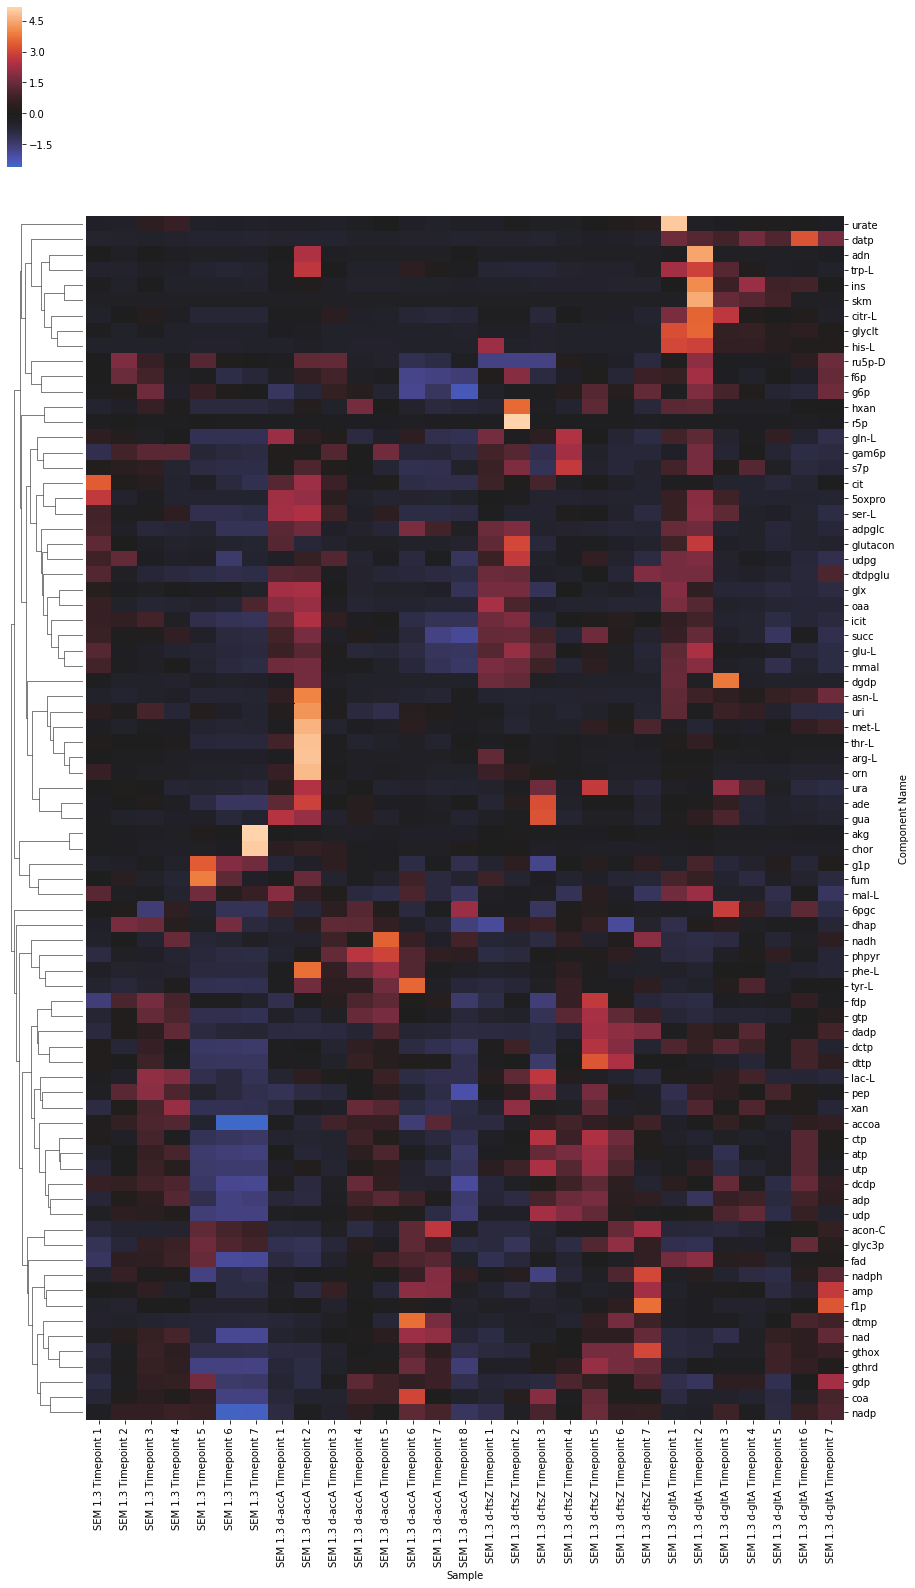

In [6]:
n = (df.transpose() - df.transpose().mean())/ df.transpose().std()
a = sns.clustermap(n.transpose(),col_cluster=False,figsize=(15,26),center=0)
a.savefig("../figures/metabolomics_heatmap.svg")

In [11]:
# read groups

met_groups = pd.read_excel('/Users/svevol/Desktop/models/putida/Metabolomics_for_Sveta.xlsx', sheet_name='Sheet1')

In [12]:
met_groups = met_groups.sort_values('Group')

In [23]:
sort_index = [i for i in met_groups['Metabolite'].values if i in df.index]

In [25]:
df = df.loc[sort_index]

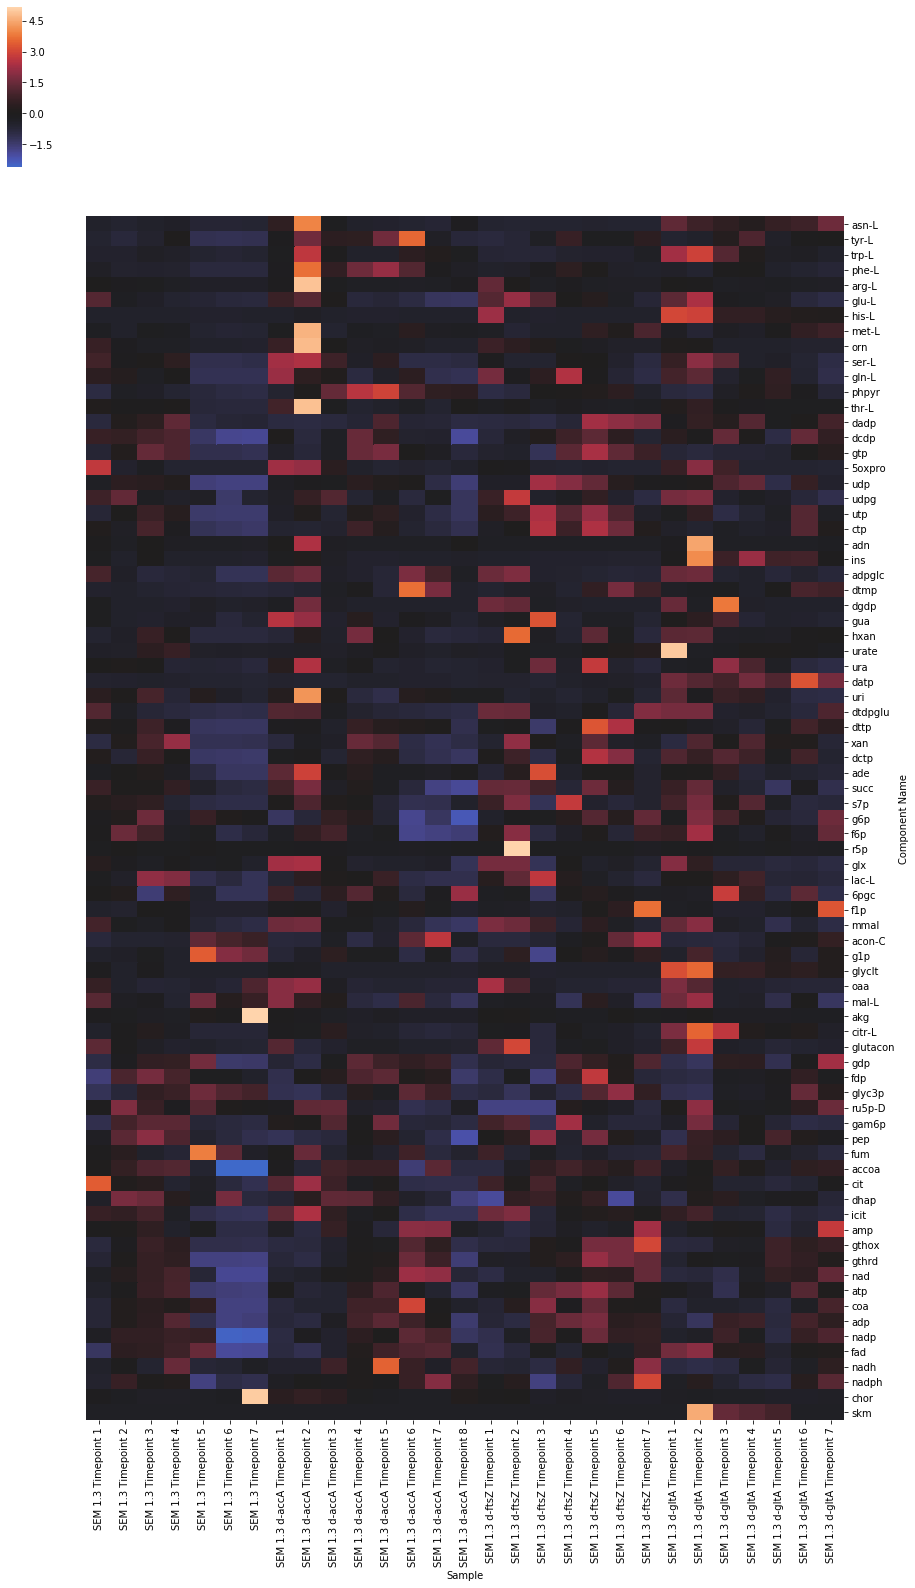

In [29]:
n = (df.transpose() - df.transpose().mean())/ df.transpose().std()
a = sns.clustermap(n.transpose(),col_cluster=False,row_cluster = False,figsize=(15,26),center=0)
#a.savefig("../figures/metabolomics_heatmap.svg")

In [53]:
genotype = [i[:-11] for i in df.columns]
timepoint = [i[-11:] for i in df.columns]

In [49]:
normalized_df = (df - df.mean())/df.std()

In [61]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(normalized_df.transpose())
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf['Strain'] = genotype
principalDf['timepoint'] = timepoint

In [57]:
#The percentage of the explained variance by component 1
pca.fit(normalized_df.transpose()).explained_variance_ratio_[0]*100

80.77276742298544

In [58]:
#The percentage of the explained variance by component 2
pca.fit(normalized_df.transpose()).explained_variance_ratio_[1]*100

13.850524657348624

In [60]:
#The percentage of the explained variance by 2 components
pca.fit(normalized_df.transpose()).explained_variance_ratio_[0]*100 + pca.fit(normalized_df.transpose()).explained_variance_ratio_[1]*100

94.62329208033407

[(-1.6, 0.5)]

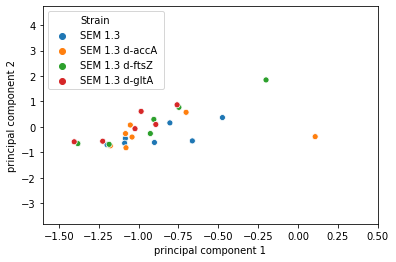

In [67]:
plot = sns.scatterplot(x="principal component 1", y="principal component 2", data=principalDf,hue='Strain', )
plot.set(xlim=(-1.6, 0.5))
#plot.figure.savefig("../figures/metabolomics_pca.svg")

[(-1.6, 0.5)]

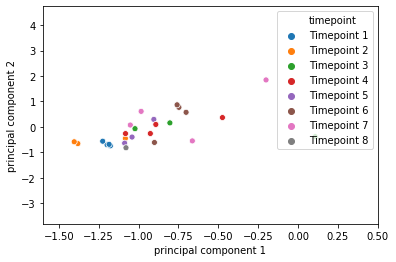

In [68]:
plot = sns.scatterplot(x="principal component 1", y="principal component 2", data=principalDf,hue='timepoint', )
plot.set(xlim=(-1.6, 0.5))

In [216]:
for i in conditions_list:
    df = pd.concat([pd.read_excel('../data/Metabolomics.xlsx', sheet_name=i) for i in conditions_list])

In [217]:
# replace negative concentrations with 0
df['Concentration, umol/gCDW'] = df['Concentration, umol/gCDW'].apply(lambda x: x if x > 0 else 0)
df['Component Name'] = df['Component Name'].str.split('.',expand=True,)[0]
df['ID'] = df['Strain']+' Timepoint '+ df['Timepoint'].astype(str) +' Rep '+df['Replicate'].astype(str)
df['Sample'] = df['Strain']+' Timepoint '+ df['Timepoint'].astype(str)
# remove all 0 values
df = df[df['Concentration, umol/gCDW'] != 0]

In [218]:
df = df[df['Timepoint']!=8] #drop timepoint 8

Text(0.5, 1.0, 'atp')

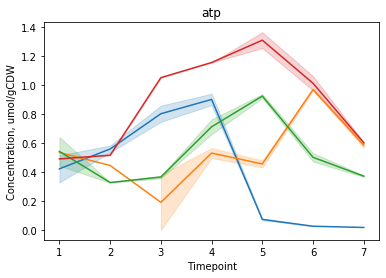

In [219]:
plotdata = df[df['Component Name']=='atp']
ax = sns.lineplot(data=plotdata, x="Timepoint", y="Concentration, umol/gCDW", hue = 'Strain', legend = False)
ax.set_title('atp')

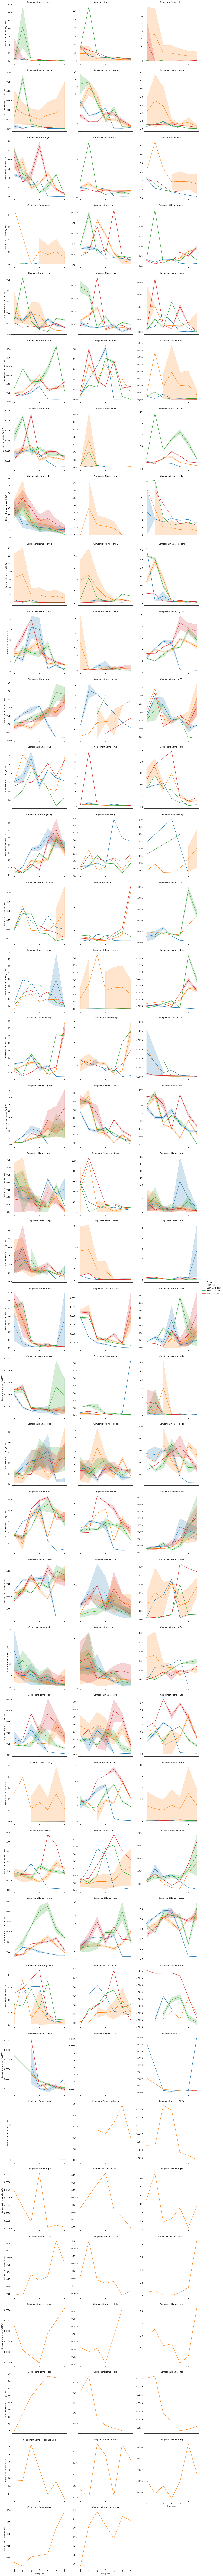

In [220]:
plot = sns.relplot(data = df, x="Timepoint", y="Concentration, umol/gCDW",
            hue = 'Strain', col = 'Component Name', col_wrap = 3, kind = 'line' , facet_kws = {'sharey': False, 'sharex': True})

In [221]:
plot.fig.savefig("../figures/metabolomics_time_courses.svg")

In [125]:
df = df.pivot(columns = 'Component Name', values = 'Concentration, umol/gCDW', index = 'ID').transpose()


In [126]:
# drop metabolites which are less that 90% of replicates are not NA and fill the rest of NA with 0
df = df.dropna(thresh=26)
df = df.fillna(0)

Component Name                       23dpg    5oxpro      6pgc     accoa  \
ID                                                                         
SEM 1.3 Timepoint 1 Rep 1         0.002820  3.103030  0.547374  0.379091   
SEM 1.3 Timepoint 1 Rep 2         0.003020  3.102800  0.427879  0.331414   
SEM 1.3 Timepoint 2 Rep 1         0.001300  0.164793  0.740496  0.428099   
SEM 1.3 Timepoint 2 Rep 2         0.000000  0.138058  0.326198  0.416942   
SEM 1.3 Timepoint 3 Rep 1         0.000931  0.670455  0.208273  0.472727   
SEM 1.3 Timepoint 3 Rep 2         0.000854  0.138000  0.118455  0.497273   
SEM 1.3 Timepoint 4 Rep 1         0.000962  0.050764  0.712360  0.465618   
SEM 1.3 Timepoint 4 Rep 2         0.000000  0.127371  0.480225  0.514157   
SEM 1.3 Timepoint 5 Rep 1         0.000512  0.071151  0.395724  0.281086   
SEM 1.3 Timepoint 5 Rep 2         0.000602  0.100082  0.381579  0.263158   
SEM 1.3 Timepoint 6 Rep 1         0.000423  0.030492  0.315648  0.021878   
SEM 1.3 Timepoint 6 Rep 2         0.000384  0.091013  0.156483  0.022742   
SEM 1.3 Timepoint 7 Rep 1         0.000248  0.114308  0.235077  0.018738   
SEM 1.3 Timepoint 7 Rep 2         0.000000  0.089477  0.233846  0.018554   
SEM 1.3 d-accA Timepoint 1 Rep 1  0.000000  2.679545  0.828182  0.344432   
SEM 1.3 d-accA Timepoint 1 Rep 2  0.000000  2.646591  0.496364  0.328068   
SEM 1.3 d-accA Timepoint 2 Rep 1  0.000000  2.434091  0.453864  0.268068   
SEM 1.3 d-accA Timepoint 2 Rep 2  0.000000  2.609091  0.211250  0.258523   
SEM 1.3 d-accA Timepoint 3 Rep 1  0.000591  0.854245  0.804245  0.494811   
SEM 1.3 d-accA Timepoint 3 Rep 2  0.000623  1.069340  0.361557  0.417972   
SEM 1.3 d-accA Timepoint 4 Rep 1  0.000488  0.168346  0.792481  0.438346   
SEM 1.3 d-accA Timepoint 4 Rep 2  0.000521  0.179599  0.694236  0.431830   
SEM 1.3 d-accA Timepoint 5 Rep 1  0.000447  0.048993  0.589681  0.458722   
SEM 1.3 d-accA Timepoint 5 Rep 2  0.000479  0.045799  0.442015  0.401966   
SEM 1.3 d-accA Timepoint 6 Rep 1  0.000488  0.113158  0.415608  0.165626   
SEM 1.3 d-accA Timepoint 6 Rep 2  0.000520  0.106261  0.224682  0.135118   
SEM 1.3 d-accA Timepoint 7 Rep 1  0.000463  0.044878  0.410490  0.441084   
SEM 1.3 d-accA Timepoint 7 Rep 2  0.000496  0.047168  0.514161  0.568881   
SEM 1.3 d-accA Timepoint 8 Rep 1  0.000197  0.192414  0.346069  0.253655   
SEM 1.3 d-accA Timepoint 8 Rep 2  0.000230  0.204828  1.543448  0.224414   
SEM 1.3 d-ftsZ Timepoint 1 Rep 1  0.000000  0.511053  0.707368  0.261184   
SEM 1.3 d-ftsZ Timepoint 1 Rep 2  0.000000  0.607237  0.178947  0.217895   
SEM 1.3 d-ftsZ Timepoint 2 Rep 1  0.000000  0.497105  0.448684  0.328816   
SEM 1.3 d-ftsZ Timepoint 2 Rep 2  0.000000  0.543421  0.448728  0.279079   
SEM 1.3 d-ftsZ Timepoint 3 Rep 1  0.000000  0.112285  0.216779  0.416854   
SEM 1.3 d-ftsZ Timepoint 3 Rep 2  0.000000  0.112328  0.216822  0.414981   
SEM 1.3 d-ftsZ Timepoint 4 Rep 1  0.000612  0.107340  0.623404  0.500355   
SEM 1.3 d-ftsZ Timepoint 4 Rep 2  0.000655  0.082411  0.384397  0.415957   
SEM 1.3 d-ftsZ Timepoint 5 Rep 1  0.000568  0.159093  0.686635  0.422912   
SEM 1.3 d-ftsZ Timepoint 5 Rep 2  0.000611  0.145513  0.397375  0.405251   
SEM 1.3 d-ftsZ Timepoint 6 Rep 1  0.000590  0.107220  0.486722  0.389627   
SEM 1.3 d-ftsZ Timepoint 6 Rep 2  0.000634  0.098112  0.440456  0.367427   
SEM 1.3 d-ftsZ Timepoint 7 Rep 1  0.000279  0.088607  0.479852  0.393185   
SEM 1.3 d-ftsZ Timepoint 7 Rep 2  0.000323  0.075956  0.365481  0.511259   
SEM 1.3 d-gltA Timepoint 1 Rep 1  0.000000  1.017333  0.726800  0.315733   
SEM 1.3 d-gltA Timepoint 1 Rep 2  0.253710  1.429333  0.138110  0.283200   
SEM 1.3 d-gltA Timepoint 2 Rep 1  0.000000  2.161333  0.736133  0.365733   
SEM 1.3 d-gltA Timepoint 2 Rep 2  0.393367  2.557333  0.086483  0.326267   
SEM 1.3 d-gltA Timepoint 3 Rep 1  0.000814  1.213768  1.654348  0.440580   
SEM 1.3 d-gltA Timepoint 3 Rep 2  0.226469  1.523188  0.528261  0.403986   
SEM 1.3 d-gltA Timepoint 4 Rep 1  0.000618  0.04

'Timepoint 1'

In [129]:
strains = [i[:-17] for i in df.columns]
tps = [i[:-17] for i in df.columns]

In [132]:
df = df.transpose()
df['strain'] = strains

/miniconda3/envs/rbcenv/lib/python3.7/site-packages/xarray/core/merge.py:10: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)
/miniconda3/envs/rbcenv/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [179]:
df_ = pg.read_dataset('mixed_anova')

In [180]:
df_

Scores    Time       Group  Subject
0    5.971435  August     Control        0
1    4.309024  August     Control        1
2    6.932707  August     Control        2
3    5.187348  August     Control        3
4    4.779411  August     Control        4
..        ...     ...         ...      ...
175  6.176981    June  Meditation       55
176  8.523692    June  Meditation       56
177  6.522273    June  Meditation       57
178  4.990568    June  Meditation       58
179  7.822986    June  Meditation       59

[180 rows x 4 columns]

In [170]:
pg.rm_anova(data=df, dv='Scores', within='Time', subject='Subject', detailed=True)

Source          SS   DF        MS         F     p-unc       np2       eps
0   Time    7.628428    2  3.814214  3.912796  0.022629  0.062194  0.998751
1  Error  115.027023  118  0.974805       NaN       NaN       NaN       NaN

In [171]:
pg.mixed_anova(data=df, dv='Scores', between='Group', within='Time',
                     subject='Subject', correction=False, effsize="np2")

Source        SS  DF1  DF2        MS         F     p-unc       np2  \
0        Group  5.459963    1   58  5.459963  5.051709  0.028420  0.080120   
1         Time  7.628428    2  116  3.814214  4.027394  0.020369  0.064929   
2  Interaction  5.167192    2  116  2.583596  2.727996  0.069545  0.044922   

        eps  
0       NaN  
1  0.998751  
2       NaN